In [1]:
from helper_functions import *
import matplotlib.pyplot as plt
from PIL import Image
import os

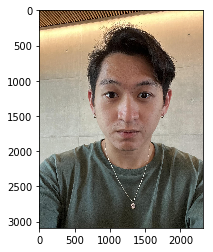

In [2]:
#################
#starting face
#################

image_dir = '/home/eddieh00/UCSD/ms/ece228/bmi_model/data/test_image'
starting_face = Image.open(os.path.join(image_dir, 'Eddie.jpg'))
plt.imshow(starting_face)
plt.show()

Cropping faces and saving to /home/eddieh00/UCSD/ms/ece228/bmi_model/data/test_image_cropped
Cropped 1 images and saved in /home/eddieh00/UCSD/ms/ece228/bmi_model/data/test_image_cropped


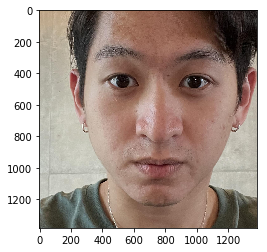

In [3]:
#######################################
###script for face detection and cropping
#######################################
import image_crop_processing

cropped_dir = '/home/eddieh00/UCSD/ms/ece228/bmi_model/data/test_image_cropped'
image_crop_processing.crop_faces(image_dir, cropped_dir)
starting_face = Image.open(os.path.join(cropped_dir, 'Eddie.jpg'))
plt.imshow(starting_face)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


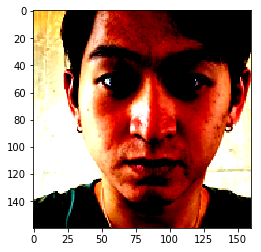

In [4]:
####################
#runs the cropped image through pre processing
#####################
image_size = (160, 160)
normalized_img = load_and_preprocess_image(os.path.join(cropped_dir, 'Eddie.jpg'), image_size)
plt.imshow(normalized_img)
plt.show()

In [5]:
##################
#runs the normalized image through facenet
#returns feature vector
######################
facenet_model_path = '/home/eddieh00/UCSD/ms/ece228/bmi_model/facenet/best_facenet_model'
image_size = (160, 160)
image_path = os.path.join(cropped_dir, 'Eddie.jpg')
embeddings = generate_test_embeddings([image_path], facenet_model_path, image_size)

print(embeddings.shape)

Model directory: /home/eddieh00/UCSD/ms/ece228/bmi_model/facenet/best_facenet_model
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275
INFO:tensorflow:Restoring parameters from /home/eddieh00/UCSD/ms/ece228/bmi_model/facenet/best_facenet_model/model-20180402-114759.ckpt-275
(1, 512)


In [6]:
from bmi_custom_model import BMI_Estimator
with tf.Session() as sess:
    ###############################
    #loads the bmi model
    #############################
    bmi_model_path = '/home/eddieh00/UCSD/ms/ece228/bmi_model/bmi_model/saved models/epoch_20'
    test = BMI_Estimator()
    checkpoint = tf.train.latest_checkpoint(bmi_model_path)
    if checkpoint:
        test.load(sess, checkpoint)
        
    #######################################
    #Generates the facenet feature vectors
    ######################################
    test_image = image_path = os.path.join(cropped_dir, 'Eddie.jpg')
    facenet_path = '/home/eddieh00/UCSD/ms/ece228/bmi_model/facenet/best_facenet_model'
    testimg = generate_test_embeddings([test_image], model_path=facenet_path, image_size=(160, 160))
    imgtensor = tf.convert_to_tensor(testimg, dtype=tf.float32)

    ############################
    #passes the facenet vector through our model
    #################################
    output_tensor = test.call(imgtensor)
    output_value = sess.run(output_tensor)

    # Evaluate the output tensor and get the actual output
    print('Estimated BMI: ' + str(output_value))
    print('my actual BMI: 23.67')

INFO:tensorflow:Restoring parameters from /home/eddieh00/UCSD/ms/ece228/bmi_model/bmi_model/saved models/epoch_20/model_weights.ckpt
Model directory: /home/eddieh00/UCSD/ms/ece228/bmi_model/facenet/best_facenet_model
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275
INFO:tensorflow:Restoring parameters from /home/eddieh00/UCSD/ms/ece228/bmi_model/facenet/best_facenet_model/model-20180402-114759.ckpt-275
Estimated BMI: [[20.37822]]
my actual BMI: 23.67
